(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


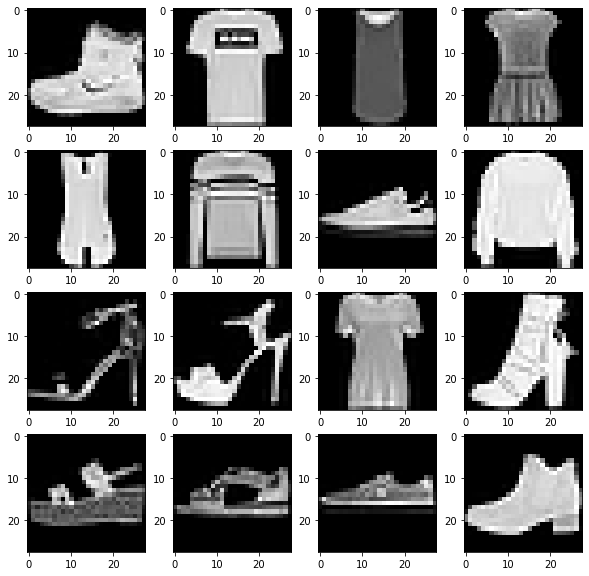

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
__________

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_Y) , (test_X,test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

#데이터크기
print(train_X.shape, test_X.shape)

plt.figure(figsize = (10,10))

#16개의 이미지 출력하기
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_X[i].reshape(28,28), cmap = 'gray')
plt.show()
print(train_Y[:16])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size = (3,3), filters = 16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 32),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64),
    tf.keras.layers.Flatten(), # 이미지이므로 차원 줄이기
    tf.keras.layers.Dense(units=  128, activation = 'relu'),
    tf.keras.layers.Dense(units =10, activation = 'softmax')
])

model.compile(optimizer= tf.keras.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()


